In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels as sm
import seaborn as sns
plt.style.library

{'bmh': RcParams({'axes.edgecolor': '#bcbcbc',
           'axes.facecolor': '#eeeeee',
           'axes.grid': True,
           'axes.labelsize': 'large',
           'axes.prop_cycle': cycler('color', ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']),
           'axes.titlesize': 'x-large',
           'grid.color': '#b2b2b2',
           'grid.linestyle': '--',
           'grid.linewidth': 0.5,
           'legend.fancybox': True,
           'lines.linewidth': 2.0,
           'mathtext.fontset': 'cm',
           'patch.antialiased': True,
           'patch.edgecolor': '#eeeeee',
           'patch.facecolor': 'blue',
           'patch.linewidth': 0.5,
           'text.hinting_factor': 8,
           'xtick.direction': 'in',
           'ytick.direction': 'in'}),
 'classic': RcParams({'_internal.classic_mode': True,
           'agg.path.chunksize': 0,
           'animation.bitrate': -1,
           'animation.codec': 'mpeg4',
     

In [3]:
bmw = pd.read_csv('bmw.csv')
bmw = bmw.sort_values(by='model').reset_index(drop=True)
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1 Series,2018,23990,Semi-Auto,4664,Petrol,150,39.8,3.0
1,1 Series,2017,21980,Semi-Auto,16718,Petrol,150,39.8,3.0
2,1 Series,2014,8490,Manual,59000,Diesel,30,65.7,2.0
3,1 Series,2014,8590,Manual,52447,Petrol,150,50.4,1.6
4,1 Series,2015,9990,Manual,26000,Petrol,145,48.7,1.6
...,...,...,...,...,...,...,...,...,...
10776,i8,2019,64750,Automatic,2277,Hybrid,140,141.2,1.5
10777,i8,2017,48898,Automatic,36127,Hybrid,0,134.5,1.5
10778,i8,2019,72000,Automatic,176,Hybrid,135,141.2,1.5
10779,i8,2019,67500,Automatic,6000,Hybrid,140,141.2,1.5


In [4]:
bmw.loc[bmw.duplicated()]  #check dup
[bmw.drop_duplicates(inplace = True,keep='first')] #drop
bmw.reset_index(drop=True)
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1 Series,2018,23990,Semi-Auto,4664,Petrol,150,39.8,3.0
1,1 Series,2017,21980,Semi-Auto,16718,Petrol,150,39.8,3.0
2,1 Series,2014,8490,Manual,59000,Diesel,30,65.7,2.0
3,1 Series,2014,8590,Manual,52447,Petrol,150,50.4,1.6
4,1 Series,2015,9990,Manual,26000,Petrol,145,48.7,1.6
...,...,...,...,...,...,...,...,...,...
10776,i8,2019,64750,Automatic,2277,Hybrid,140,141.2,1.5
10777,i8,2017,48898,Automatic,36127,Hybrid,0,134.5,1.5
10778,i8,2019,72000,Automatic,176,Hybrid,135,141.2,1.5
10779,i8,2019,67500,Automatic,6000,Hybrid,140,141.2,1.5


In [5]:
bmw.info()
# bmw.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10664 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10664 non-null  object 
 1   year          10664 non-null  int64  
 2   price         10664 non-null  int64  
 3   transmission  10664 non-null  object 
 4   mileage       10664 non-null  int64  
 5   fuelType      10664 non-null  object 
 6   tax           10664 non-null  int64  
 7   mpg           10664 non-null  float64
 8   engineSize    10664 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 833.1+ KB


- how many car sell (filter by year, transmistion and fueltype)
- which transmistion have highest mileage in average
- according to year, price, decide which model is high class, or normal class

In [45]:
plt.style.use

<function matplotlib.style.core.use(style)>

Text(0.5, 1.0, 'Increasing year by year')

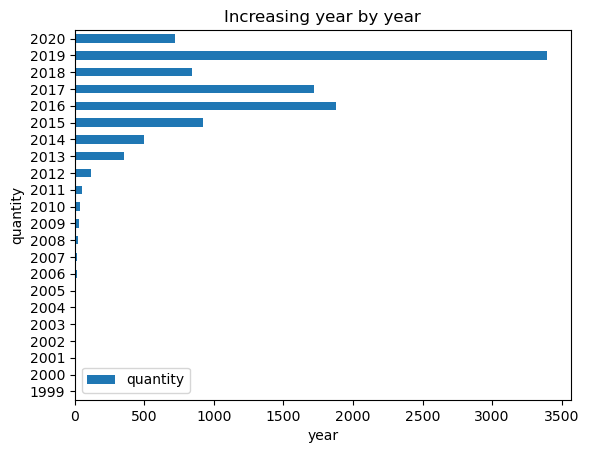

In [49]:
quantity = []
year = []
for i in range(1999,2021):
    q = bmw.loc[(bmw['year'] == i)]['year'].count()
    quantity.append(q)
    year.append(i)
df = pd.DataFrame(data=quantity,index=year)
df['quantity'] = df[0]
df = df.drop(columns=0)
df.plot.barh()
plt.xlabel('year')
plt.ylabel('quantity')
plt.title('Increasing year by year')
# pd.concat([year,quantity],axis=1,keys=['year','quantity']).plot.line()
# dic = {'col':['a','b'],
#        'as':[2,3]}
# pd.DataFrame(data=dic)


C:\Users\tanguyn\AppData\Local\Temp\ipykernel_12160\2538596484.py:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(2000,2022,5)


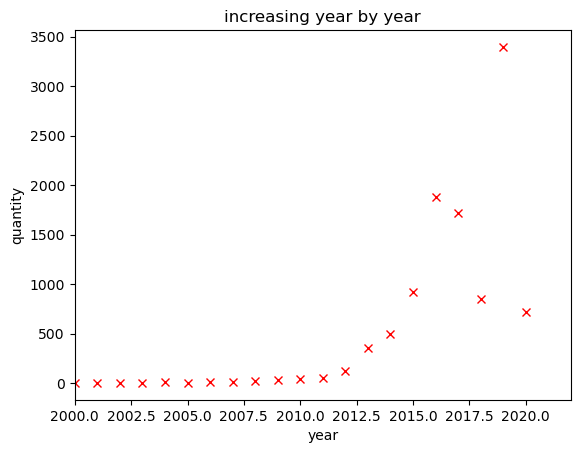

In [81]:
plt.plot(df,'rx',label = 'year')
plt.title("increasing year by year")
plt.xlabel("year")
plt.ylabel("quantity")
plt.xlim(2000,2022,5)

plt.show()


<Axes: ylabel='None'>

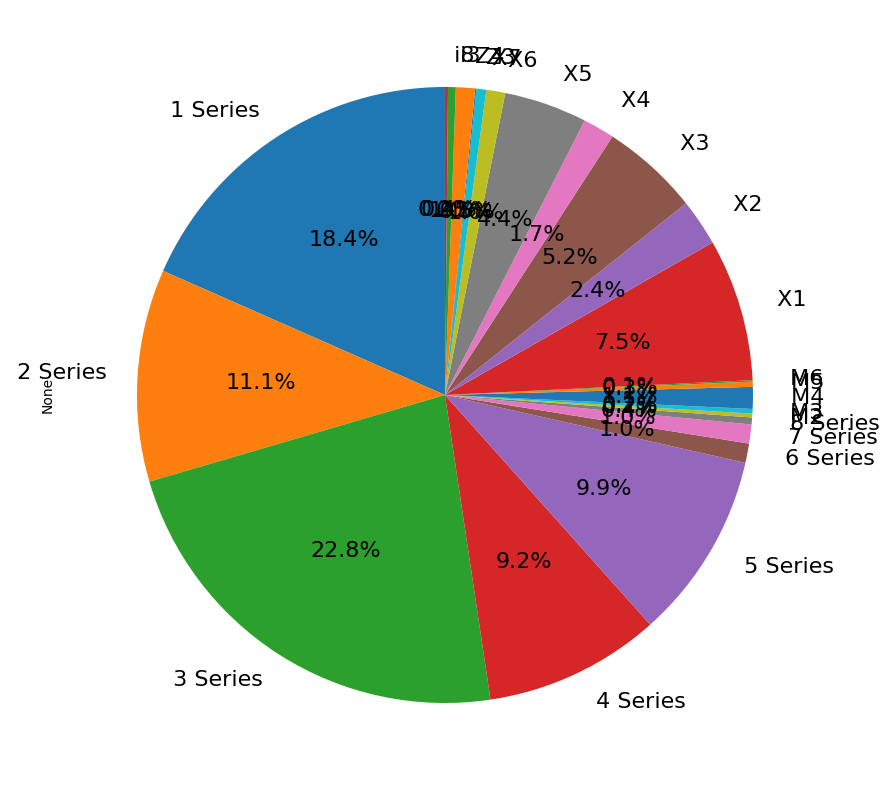

In [106]:
gr_model = bmw.groupby('model').size()
gr_model.plot.pie(autopct='%1.1f%%',figsize = (10,10),startangle=90, fontsize = 16)
# plt.axis('equal')
# plt.tight_layout()

In [24]:
import plotly.express as px

In [12]:
bmw['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [16]:
bmw.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [23]:
bmw.engineSize.unique()

array([2. , 3. , 1.5, 0.6, 1.6, 4.4, 0. , 2.2, 2.5, 4. , 3.2, 1. , 5. ,
       1.9, 6.6, 2.8, 3.5])

In [88]:
diesel = bmw.loc[(bmw['fuelType'] == 'Diesel')]
petrol = bmw.loc[(bmw['fuelType'] == 'Petrol')]
hybrid = bmw.loc[(bmw['fuelType'] == 'Hybrid')]
automatic = bmw.loc[(bmw['transmission'] == 'Automatic')].sort_values(by='mileage')
manual = bmw.loc[(bmw['transmission'] == 'Manual')].sort_values(by='mileage')
Semi_Auto = bmw.loc[(bmw['transmission'] == 'Semi-Auto')].sort_values(by='mileage')

<Axes: >

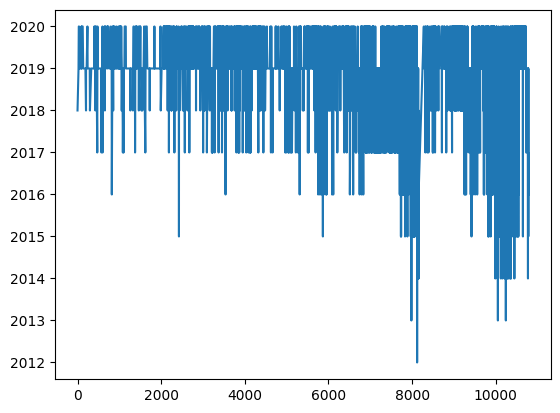

In [103]:
bmw.loc[(bmw.price)>22692.888691]['year'].plot()
# plt.show()

<Axes: >

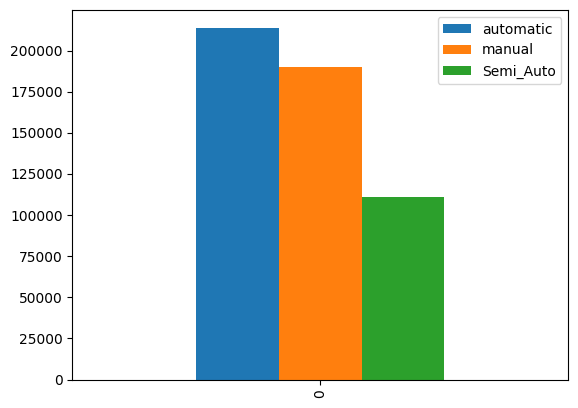

In [102]:
# df = {'automatic':[]}
df = pd.DataFrame()
"""lọc và sắp xếp dữ liệu theo cột mileage"""
# automatic = automatic.sort_values(by='mileage',ascending=False).reset_index(drop=True)
# manual = manual.sort_values(by='mileage',ascending=False).reset_index(drop=True)
# Semi_Auto = Semi_Auto.sort_values(by='mileage',ascending=False).reset_index(drop=True)
# manual.sort_values(ascending=False).reset_index(drop=True)
"""gán cột mileage"""
automatic = automatic.reset_index(drop=True).sort_values(ascending=False)
manual = manual.reset_index(drop=True).sort_values(ascending=False)
Semi_Auto = Semi_Auto.reset_index(drop=True).sort_values(ascending=False)
df = pd.concat([automatic,manual,Semi_Auto],axis=1,keys=['automatic','manual','Semi_Auto'])
df.dropna()
df.head(1).plot.bar()
# plt.show()




In [9]:
pr = bmw.loc[(bmw.price)>22692.888691]

In [20]:
# bmw.mileage.describe()
# ml = bmw.loc[(bmw.mileage)> bmw.mileage.mean() & (bmw.engineSize) < 3.0]


In [12]:
bmw[(bmw['model']== ' 3 Series') & (bmw['transmission'] == 'Automatic')].where((bmw['mileage'] > 40000)).dropna()
# bmw[bmw['year']==2014]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12,X3,2016.0,15500.0,Automatic,77823.0,Diesel,125.0,54.3,2.0
29,X3,2015.0,17400.0,Automatic,50316.0,Diesel,200.0,47.9,3.0
42,X3,2013.0,12000.0,Automatic,79972.0,Diesel,200.0,47.1,3.0
46,X3,2017.0,18000.0,Automatic,74852.0,Diesel,150.0,47.1,3.0
100,X3,2016.0,15900.0,Automatic,59692.0,Diesel,145.0,54.3,2.0
...,...,...,...,...,...,...,...,...,...
10657,X3,2009.0,7495.0,Automatic,95000.0,Diesel,260.0,42.2,2.0
10701,X3,2016.0,19995.0,Automatic,41000.0,Diesel,150.0,54.3,2.0
10747,X3,2016.0,17600.0,Automatic,43410.0,Diesel,145.0,54.3,2.0
10758,X3,2014.0,14400.0,Automatic,43307.0,Diesel,145.0,54.3,2.0


AttributeError: Line2D.set() got an unexpected keyword argument 'width'

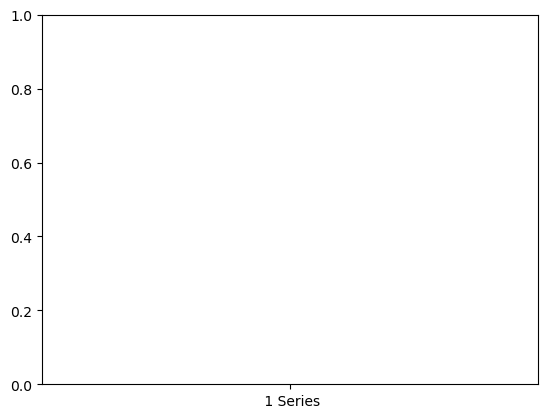

In [115]:
# series_5 = bmw[(bmw['model']==' 5 Series')]['model'].count()
# series_6 = bmw[(bmw['model']==' 6 Series')]['model'].count()
# series_1 = bmw[(bmw['model']==' 1 Series')]['model'].count()
# series_7 = bmw[(bmw['model']==' 7 Series')]['model'].count()
# series_2 = bmw[(bmw['model']==' 2 Series')]['model'].count()
# series_4 = bmw[(bmw['model']==' 4 Series')]['model'].count()
# series_3 = bmw[(bmw['model']==' 3 Series')]['model'].count()
# series_8 = bmw[(bmw['model']==' 8 Series')]['model'].count()
# x1 = bmw[(bmw['model'] == ' X1')]['model'].count()
# x3 = bmw[(bmw['model'] == ' X3')]['model'].count()
# x5 = bmw[(bmw['model'] == ' X5')]['model'].count()
# x4 = bmw[(bmw['model'] == ' X4')]['model'].count()
# x2 = bmw[(bmw['model'] == ' X2')]['model'].count()
# x6 = bmw[(bmw['model'] == ' X6')]['model'].count()
# x7 = bmw[(bmw['model'] == ' X7')]['model'].count()
# i3 = bmw[(bmw['model'] == ' i3')]['model'].count()
# i8 = bmw[(bmw['model'] == ' i8')]['model'].count()
# m2 = bmw[(bmw['model'] == ' M2')]['model'].count()
# m3 = bmw[(bmw['model'] == ' M3')]['model'].count()
# m4 = bmw[(bmw['model'] == ' M4')]['model'].count()
# m5 = bmw[(bmw['model'] == ' M5')]['model'].count()
# m6 = bmw[(bmw['model'] == ' M6')]['model'].count()
# z3 = bmw[(bmw['model'] == ' Z3')]['model'].count()
# z4 = bmw[(bmw['model'] == ' Z4')]['model'].count()
bmw1 = bmw.groupby('model').size()
plt.plot(bmw1,width=1)


In [93]:
bmw['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

<Axes: xlabel='model'>

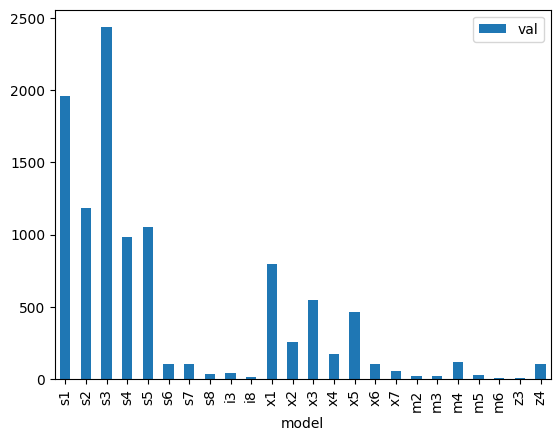

In [92]:
# md = [series_1,series_2,series_3,series_4,series_5,series_6,series_7,series_8,i3,i8,x1,x2,x3,x4,x5,x6,x7,m2,m3,m4,m5,m6,z3,z4]
# index = ['s1','s2','s3','s4','s5','s6','s7','s8','i3','i8','x1','x2','x3','x4','x5','x6','x7','m2','m3','m4','m5','m6','z3','z4']

# md = pd.DataFrame({'model': index,'val' : md})
# md.plot.bar(x='model',y='val')

TypeError: pie() got an unexpected keyword argument 'explore'

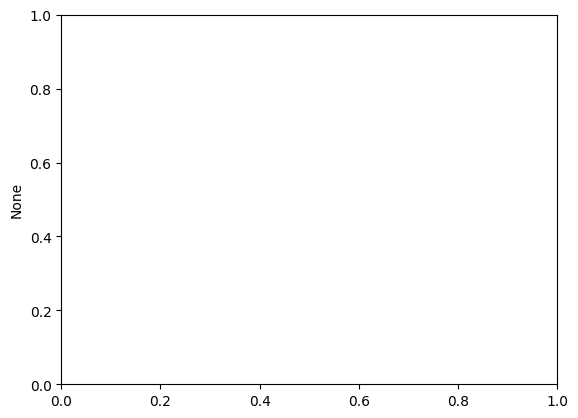

In [105]:
bmw_since2017 = bmw[(bmw['year']>=1999)].sort_values(by=['model','year','transmission','fuelType','mpg'])
bmw_since2017.reset_index(drop=True)
series3_since2017 = bmw_since2017.loc[(bmw_since2017['model'] == ' 3 Series')].reset_index(drop=True)
series3_since2017.groupby('year').size().plot.pie(autopct='%1.1f%%',explore =(0.1,0.1,0.1))
plt.title('Series 3 qua các năm')
plt.ylabel("")


In [160]:
bmw.loc[(bmw['model'] == ' i8')].describe()
bmw.loc[(bmw['model'] == ' i8')].where((bmw['price'] >= 65000)).dropna()
# bmw.describe()
bmw['high class'] = np.where(bmw['price'] >= 30000,1,0) #1 is True, 0 is false
bmw
# .where((bmw['mileage'] > 40000)).dropna()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,high class
0,1 Series,2017,22490,Semi-Auto,15985,Petrol,145,39.8,3.0,0
1,1 Series,2017,12942,Manual,36274,Diesel,145,70.6,1.5,0
2,1 Series,2017,13888,Manual,15512,Petrol,150,53.3,1.5,0
3,1 Series,2015,14690,Semi-Auto,23234,Petrol,125,54.3,1.5,0
4,1 Series,2018,14750,Automatic,24791,Petrol,150,55.5,1.5,0
...,...,...,...,...,...,...,...,...,...,...
10659,i8,2015,44990,Automatic,43323,Hybrid,0,134.5,1.5,1
10660,i8,2018,57870,Automatic,11278,Hybrid,135,134.5,1.5,1
10661,i8,2019,64750,Automatic,2799,Hybrid,135,141.2,1.5,1
10662,i8,2015,42890,Automatic,43102,Hybrid,0,134.5,1.5,1


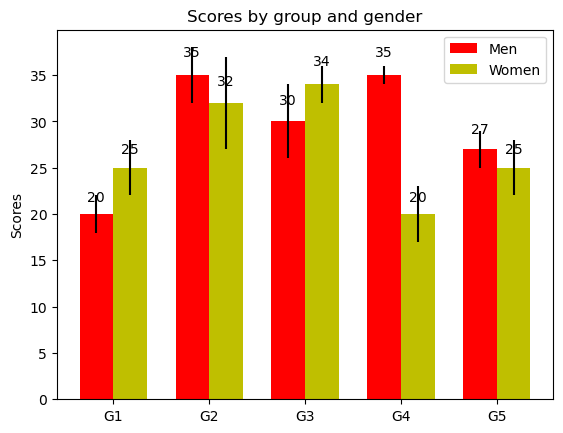

In [78]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()